In [53]:
import pandas as pd
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "vscode"
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
import joblib
from IPython.display import display

In [2]:
path = pathlib.Path("Dataset")
months = {"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6,
          "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12}

all_df = pd.DataFrame()
for f in path.iterdir():
    num_month = months[f.name[:3]]
    year = int(f.name[-8:-4])
    df = pd.read_csv(path / f.name)
    df["year"] = year
    df["month"] = num_month
    all_df = all_df.append(df)

display(all_df)

C:\Users\digof\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3251: DtypeWarning:

Columns (62,87) have mixed types.Specify dtype option on import or set low_memory=False.

C:\Users\digof\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3251: DtypeWarning:

Columns (61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.

C:\Users\digof\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3251: DtypeWarning:

Columns (87) have mixed types.Specify dtype option on import or set low_memory=False.



id                            listing_url       scrape_id  \
0         14063     https://www.airbnb.com/rooms/14063  20180414160018   
1         17878     https://www.airbnb.com/rooms/17878  20180414160018   
2         24480     https://www.airbnb.com/rooms/24480  20180414160018   
3         25026     https://www.airbnb.com/rooms/25026  20180414160018   
4         31560     https://www.airbnb.com/rooms/31560  20180414160018   
...         ...                                    ...             ...   
34324  38844730  https://www.airbnb.com/rooms/38844730  20190923212307   
34325  38846408  https://www.airbnb.com/rooms/38846408  20190923212307   
34326  38846703  https://www.airbnb.com/rooms/38846703  20190923212307   
34327  38847050  https://www.airbnb.com/rooms/38847050  20190923212307   
34328  38847655  https://www.airbnb.com/rooms/38847655  20190923212307   

      last_scraped                                          name  \
0       2018-04-14                          Living in a Postcard   
1       2018-04-14             Very Nice 2Br - Copacabana - WiFi   
2       2018-04-14              Nice and cozy near Ipanema Beach   
3       2018-04-14     Beautiful Modern Decorated Studio in Copa   
4       2018-04-14              NICE & COZY 1BDR - IPANEMA BEACH   
...            ...                                           ...   
34324   2019-09-24             TRANSAMERICA BARRA DA TIJUCA R IV   
34325   2019-09-24                      Alugo para o Rock in Rio   
34326   2019-09-24  Apt COMPLETO em COPACABANA c/TOTAL SEGURANÇA   
34327   2019-09-24                     Cobertura Cinematografica   
34328   2019-09-24     Quarto em cobertura em frente à praia III   

                                                 summary  \
0      Besides the most iconic's view, our apartment ...   
1      Please note that special rates apply for New Y...   
2      My studio is located in the best  of Ipanema. ...   
3      Our apartment is a little gem, everyone loves ...   
4      This nice and clean 1 bedroom apartment is loc...   
...                                                  ...   
34324  Em estilo contemporâneo, o Transamerica Prime ...   
34325  Confortável apartamento, 2 quartos , sendo 1 s...   
34326  Apartamento quarto e sala COMPLETO para curtas...   
34327                               Cobertura alto nivel   
34328  Quarto em cobertura quadriplex com vista lindí...   

                                                   space  \
0                                                    NaN   
1      - large balcony which looks out on pedestrian ...   
2      The studio is located at Vinicius de Moraes St...   
3      This newly renovated studio (last renovations ...   
4      This nice and clean 1 bedroom apartment is loc...   
...                                                  ...   
34324                                                NaN   
34325  O apartamento estará com mobília completa disp...   
34326  Espaço ideal para até 5 pessoas. Cama de casal...   
34327                                                NaN   
34328                                                NaN   

                                             description experiences_offered  \
0      Besides the most iconic's view, our apartment ...                none   
1      Please note that special rates apply for New Y...                none   
2      My studio is located in the best  of Ipanema. ...                none   
3      Our apartment is a little gem, everyone loves ...                none   
4      This nice and clean 1 bedroom apartment is loc...                none   
...                                                  ...                 ...   
34324  Em estilo contemporâneo, o Transamerica Prime ...                none   
34325  Confortável apartamento, 2 quartos , sendo 1 s...                none   
34326  Apartamento quarto e sala COMPLETO para curtas...                none   
34327                               Cobertura alto nivel         

In [3]:

columns = ['host_is_superhost', 'host_listings_count', 'latitude', 'longitude',
'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
'bed_type', 'amenities', 'price', 'guests_included','extra_people',
'minimum_nights', 'maximum_nights', 'number_of_reviews', 'instant_bookable',
'is_business_travel_ready', 'cancellation_policy', 'year', 'month']

all_df = all_df[columns]

display(all_df)

host_is_superhost  host_listings_count   latitude  longitude  \
0                     f                  1.0 -22.946854 -43.182737   
1                     t                  2.0 -22.965919 -43.178962   
2                     f                  1.0 -22.985698 -43.201935   
3                     f                  3.0 -22.977117 -43.190454   
4                     t                  1.0 -22.983024 -43.214270   
...                 ...                  ...        ...        ...   
34324                 f                  0.0 -23.003180 -43.342840   
34325                 f                  0.0 -22.966640 -43.393450   
34326                 f                 32.0 -22.962080 -43.175520   
34327                 f                  0.0 -23.003400 -43.341820   
34328                 f                  5.0 -23.010560 -43.363350   

      property_type        room_type  accommodates  bathrooms  bedrooms  beds  \
0         Apartment  Entire home/apt             4        1.0       0.0   2.0   
1       Condominium  Entire home/apt             5        1.0       2.0   2.0   
2         Apartment  Entire home/apt             2        1.0       1.0   1.0   
3         Apartment  Entire home/apt             3        1.0       1.0   2.0   
4         Apartment  Entire home/apt             3        1.0       1.0   2.0   
...             ...              ...           ...        ...       ...   ...   
34324     Apartment  Entire home/apt             4        1.0       0.0   2.0   
34325     Apartment  Entire home/apt             4        2.0       2.0   3.0   
34326     Apartment  Entire home/apt             5        1.0       1.0   2.0   
34327     Apartment  Entire home/apt             4        1.0       1.0   1.0   
34328     Apartment     Private room             2        0.0       1.0   1.0   

       ... guests_included extra_people minimum_nights  maximum_nights  \
0      ...               2       $34.00             60             365   
1      ...               2       $51.00              4              90   
2      ...               2      $215.00              3              90   
3      ...               2       $45.00              4              30   
4      ...               2       $68.00              2            1125   
...    ...             ...          ...            ...             ...   
34324  ...               2       $50.00              1            1125   
34325  ...               1        $0.00              2            1125   
34326  ...               3       $30.00              3            1125   
34327  ...               1        $0.00              1            1125   
34328  ...               2       $80.00              1              30   

      number_of_reviews  instant_bookable  is_business_travel_ready  \
0                    38                 f                         f   
1                   205                 t                         f   
2                    85                 f                         f   
3                   208                 f                         f   
4                   200                 t                         f   
...                 ...               ...                       ...   
34324                 0                 f                         f   
34325                 0                 f                         f   
34326                 0                 f                         f   
34327                 0                 f                         f   
34328                 0                 f                         f   

               cancellation_policy  year month  
0      strict_14_with_grace_period  2018     4  
1                           strict  2018     4  
2                           strict  2018     4  
3                           strict  2018     4  
4                           strict  2018     4  
...                            ...   ...   ...  
34324                     flexible  2019     9  
34325                     flexible  2019     9  
34326  st

In [4]:
all_df = all_df.dropna()
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 897709 entries, 0 to 34328
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   host_is_superhost         897709 non-null  object 
 1   host_listings_count       897709 non-null  float64
 2   latitude                  897709 non-null  float64
 3   longitude                 897709 non-null  float64
 4   property_type             897709 non-null  object 
 5   room_type                 897709 non-null  object 
 6   accommodates              897709 non-null  int64  
 7   bathrooms                 897709 non-null  float64
 8   bedrooms                  897709 non-null  float64
 9   beds                      897709 non-null  float64
 10  bed_type                  897709 non-null  object 
 11  amenities                 897709 non-null  object 
 12  price                     897709 non-null  object 
 13  guests_included           897709 non-null  in

In [5]:
all_df["price"] = all_df["price"].str.replace("$", "")
all_df["price"] = all_df["price"].str.replace(",", "")
all_df["price"] = all_df["price"].astype(np.float32, copy=False)

all_df["extra_people"] = all_df["extra_people"].str.replace("$", "")
all_df["extra_people"] = all_df["extra_people"].str.replace(",", "")
all_df["extra_people"] = all_df["extra_people"].astype(np.float32, copy=False)

all_df.info()

C:\Users\digof\AppData\Local\Temp\ipykernel_23512\448458346.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

C:\Users\digof\AppData\Local\Temp\ipykernel_23512\448458346.py:5: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



<class 'pandas.core.frame.DataFrame'>
Int64Index: 897709 entries, 0 to 34328
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   host_is_superhost         897709 non-null  object 
 1   host_listings_count       897709 non-null  float64
 2   latitude                  897709 non-null  float64
 3   longitude                 897709 non-null  float64
 4   property_type             897709 non-null  object 
 5   room_type                 897709 non-null  object 
 6   accommodates              897709 non-null  int64  
 7   bathrooms                 897709 non-null  float64
 8   bedrooms                  897709 non-null  float64
 9   beds                      897709 non-null  float64
 10  bed_type                  897709 non-null  object 
 11  amenities                 897709 non-null  object 
 12  price                     897709 non-null  float32
 13  guests_included           897709 non-null  in

<AxesSubplot:>

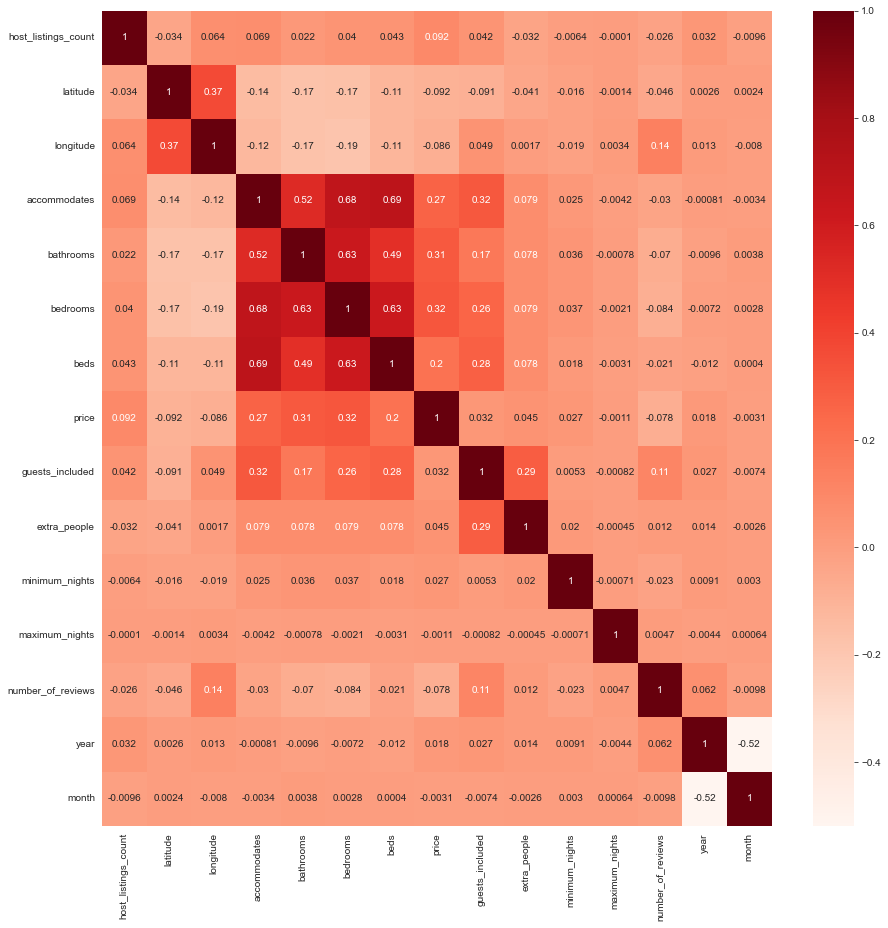

In [6]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,15))
sns.heatmap(all_df.corr(), annot=True, cmap="Reds")

In [7]:
def limit(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    rangeV = q3 - q1
    return q1 - 1.5 * rangeV, q3 + 1.5 * rangeV

def remove_outliers(df, column_name):
    qty_values = df.shape[0]
    inf_lim, sup_lim = limit(df[column_name])
    df = df.loc[(df[column_name] >= inf_lim) & (df[column_name] <= sup_lim), :]
    return df, qty_values - df.shape[0]


In [8]:
def diagram_box(column):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    sns.boxplot(x = column, ax = ax1)
    ax2.set_xlim(limit(column))
    sns.boxplot(x = column, ax = ax2)

def histogram(column):
    plt.figure(figsize = (15, 5))
    sns.distplot(column, hist=True)

def bar(column):
    plt.figure(figsize = (15, 5))
    ax = sns.barplot(x = column.value_counts().index, y = column.value_counts())
    #ax.set_xlim(limit(column))

C:\Users\digof\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



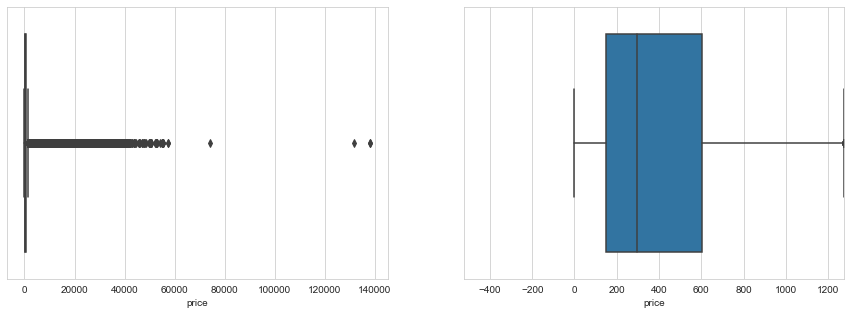

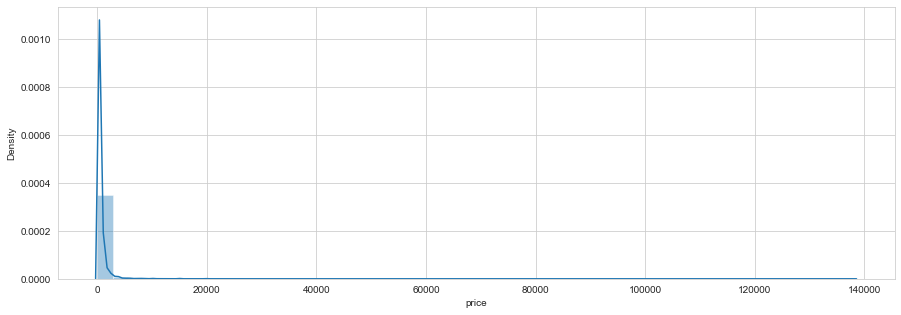

In [9]:
diagram_box(all_df["price"])
histogram(all_df["price"])

In [10]:
all_df, removed_lines = remove_outliers(all_df, "price")
print(removed_lines)

87282


C:\Users\digof\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



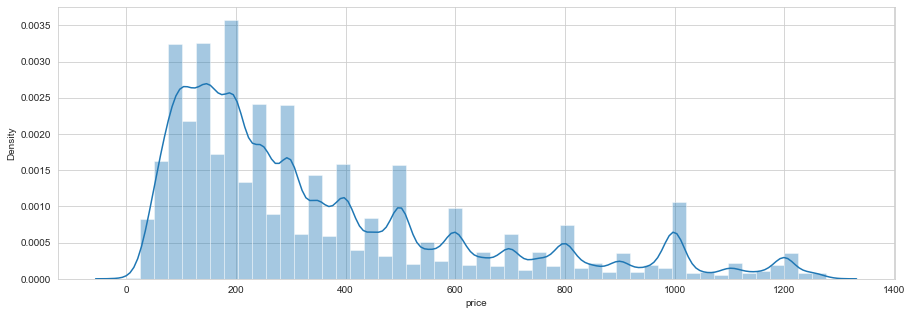

In [11]:
histogram(all_df["price"])

C:\Users\digof\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



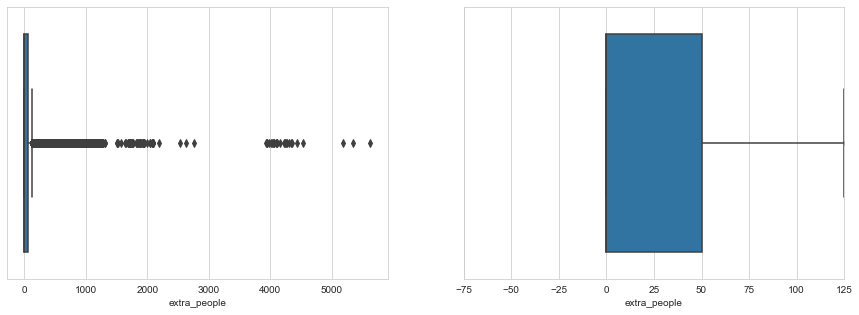

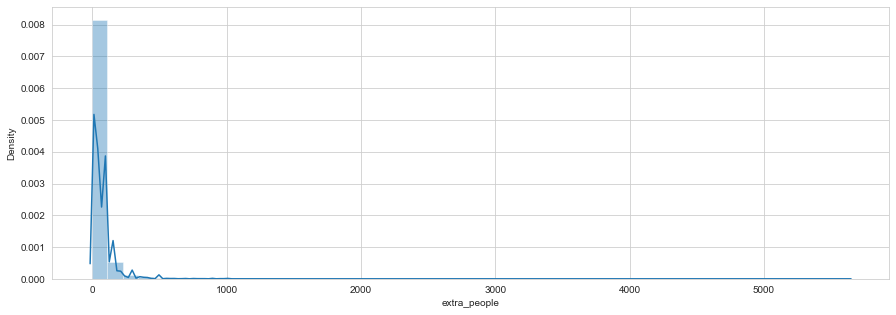

In [12]:
diagram_box(all_df["extra_people"])
histogram(all_df["extra_people"])

59194


C:\Users\digof\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



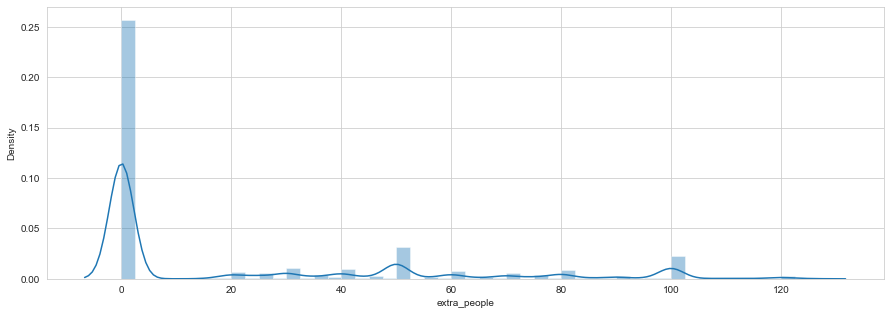

In [13]:
all_df, removed_lines = remove_outliers(all_df, "extra_people")
print(removed_lines)
histogram(all_df["extra_people"])

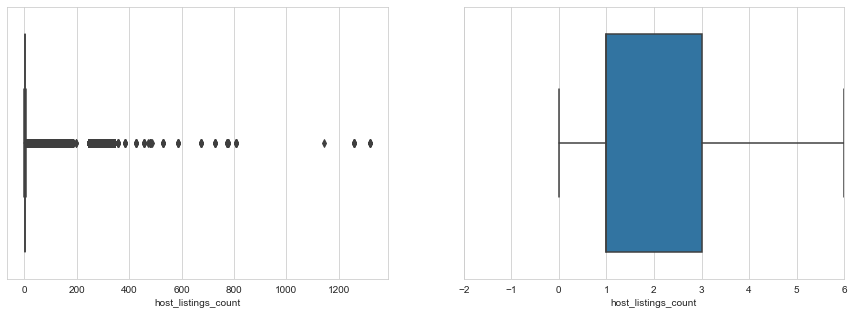

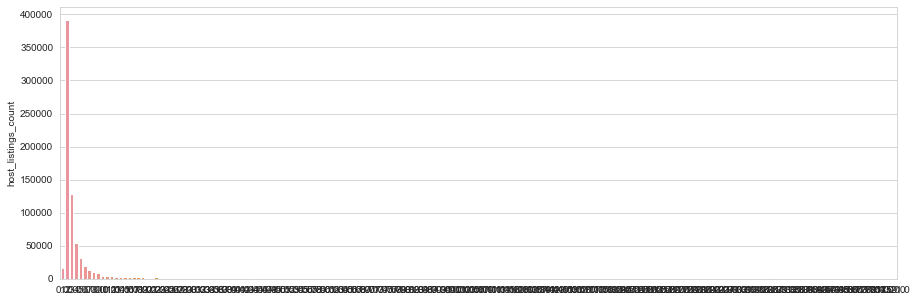

In [14]:
diagram_box(all_df["host_listings_count"])
bar(all_df["host_listings_count"])

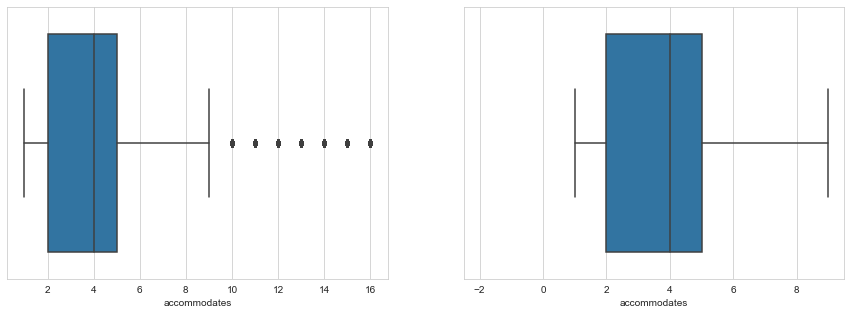

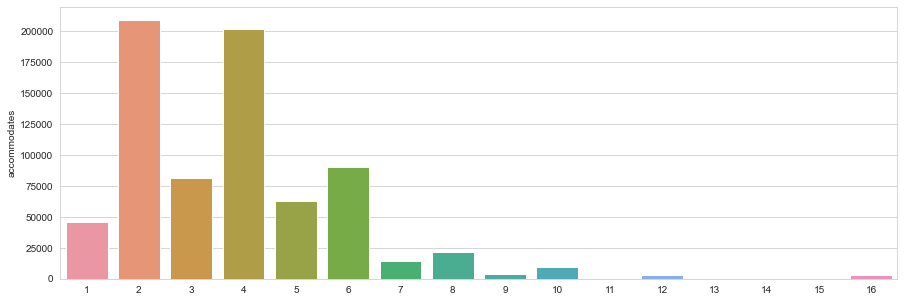

In [15]:
diagram_box(all_df["accommodates"])
bar(all_df["accommodates"])

<AxesSubplot:ylabel='bathrooms'>

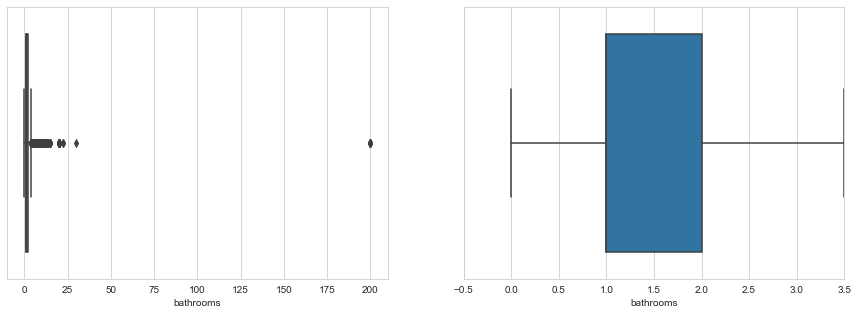

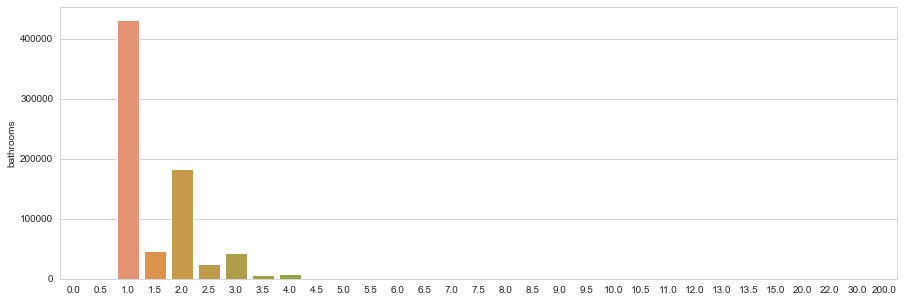

In [16]:
diagram_box(all_df["bathrooms"])
plt.figure(figsize=(15,5))
sns.barplot(x=all_df["bathrooms"].value_counts().index, y=all_df["bathrooms"].value_counts())

13475


<AxesSubplot:ylabel='bathrooms'>

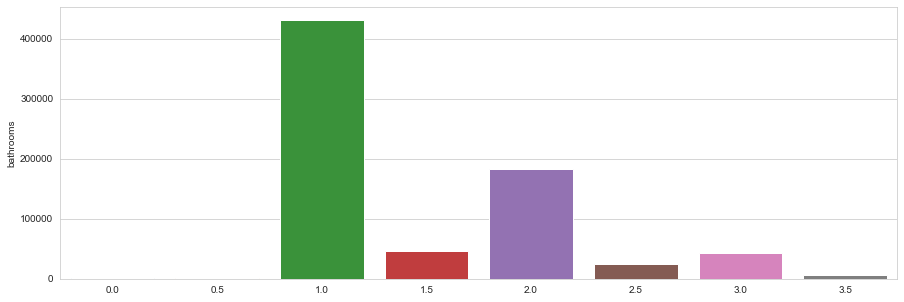

In [17]:
all_df, removed_lines = remove_outliers(all_df, "bathrooms")
print(removed_lines)
plt.figure(figsize=(15,5))
sns.barplot(x=all_df["bathrooms"].value_counts().index, y=all_df["bathrooms"].value_counts())

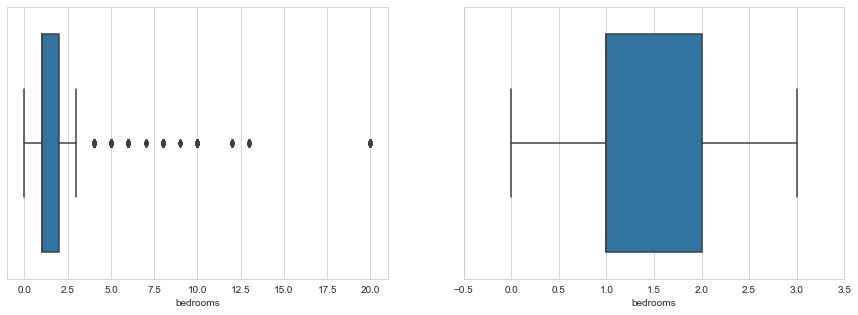

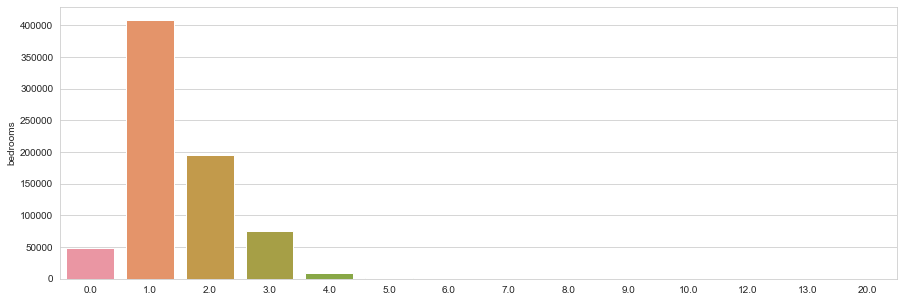

In [18]:
diagram_box(all_df["bedrooms"])
bar(all_df["bedrooms"])

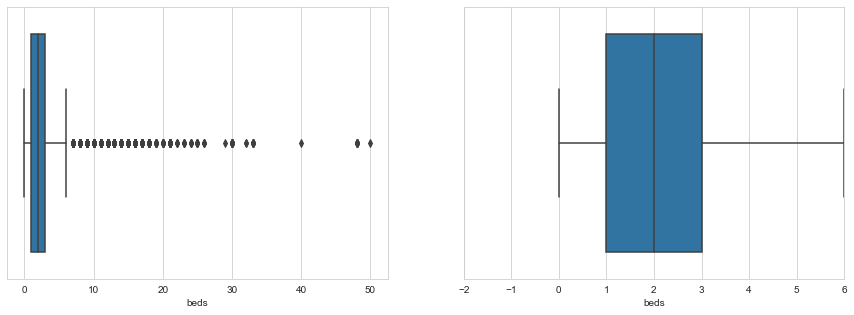

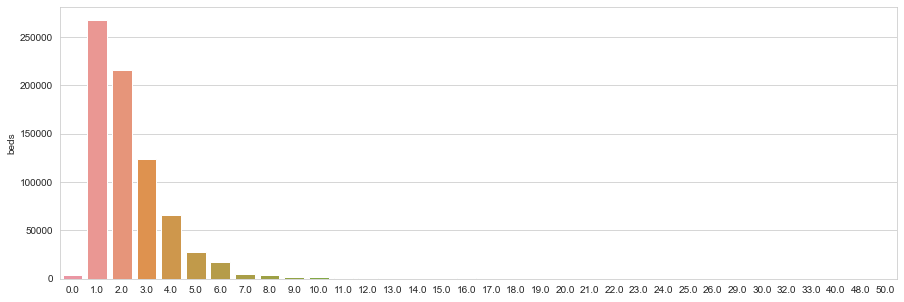

In [19]:
diagram_box(all_df["beds"])
bar(all_df["beds"])

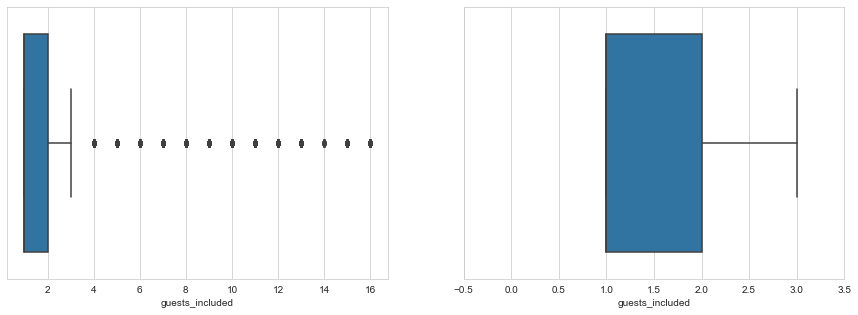

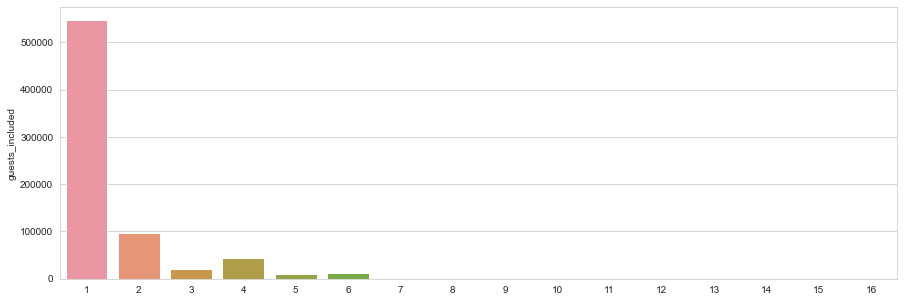

In [20]:
diagram_box(all_df["guests_included"])
bar(all_df["guests_included"])

In [21]:
all_df = all_df.drop("guests_included", axis = 1)

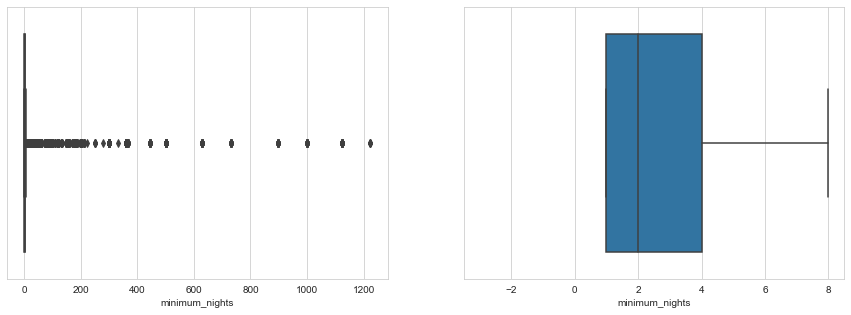

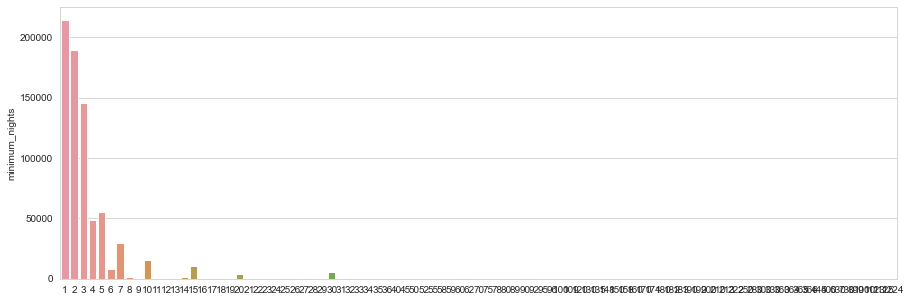

In [22]:
diagram_box(all_df["minimum_nights"])
bar(all_df["minimum_nights"])

44645


<AxesSubplot:ylabel='minimum_nights'>

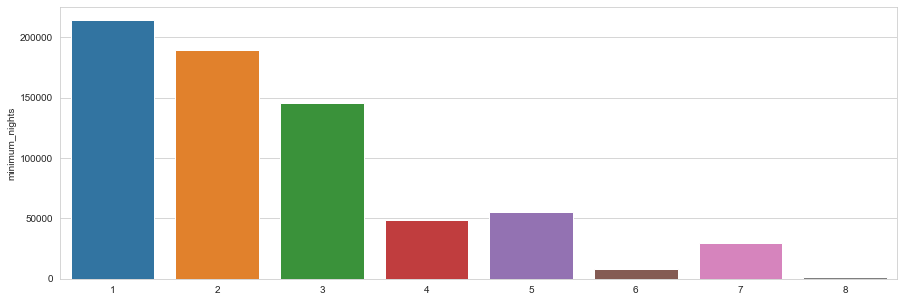

In [23]:
all_df, removed_lines = remove_outliers(all_df, "minimum_nights")
print(removed_lines)
plt.figure(figsize=(15,5))
sns.barplot(x=all_df["minimum_nights"].value_counts().index, y=all_df["minimum_nights"].value_counts())

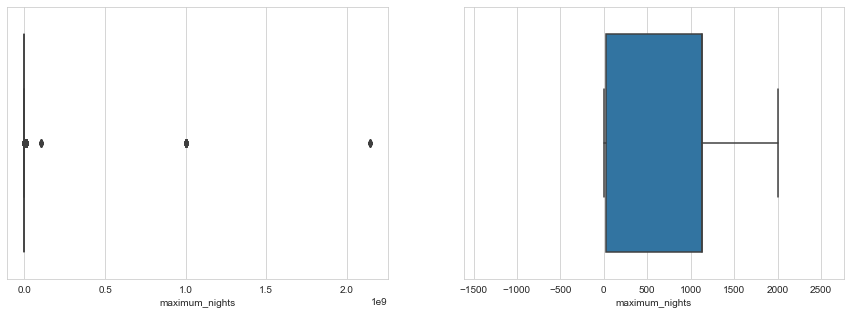

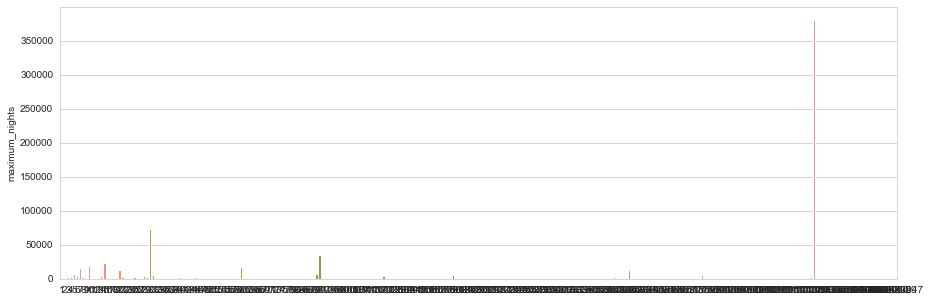

In [24]:
diagram_box(all_df["maximum_nights"])
bar(all_df["maximum_nights"])

In [25]:
all_df = all_df.drop("maximum_nights", axis = 1)

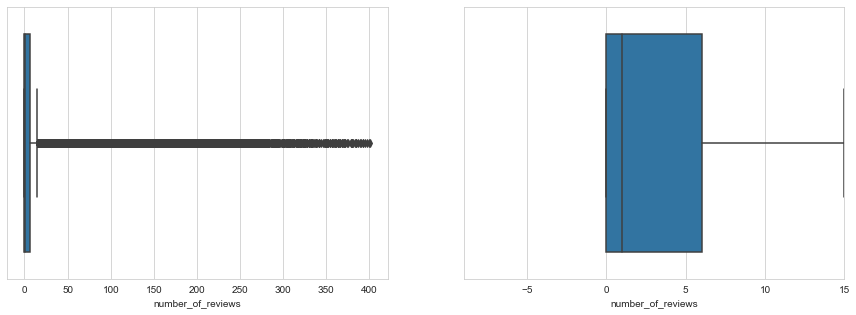

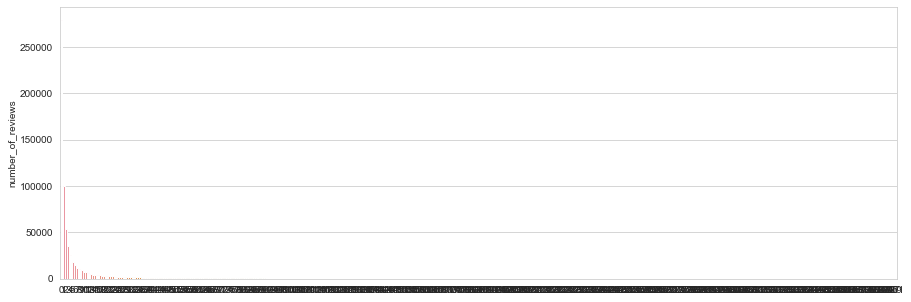

In [26]:
diagram_box(all_df["number_of_reviews"])
bar(all_df["number_of_reviews"])

Apartment                 541515
House                      61648
Condominium                31832
Serviced apartment         17332
Loft                       13403
Bed and breakfast           4791
Guest suite                 4218
Hostel                      3778
Guesthouse                  2647
Other                       2631
Villa                       1446
Aparthotel                  1303
Hotel                       1154
Townhouse                   1142
Boutique hotel               574
Earth house                  555
Chalet                       533
Tiny house                   495
Cottage                      335
Casa particular (Cuba)       310
Bungalow                     260
Dorm                         202
Cabin                        182
Nature lodge                 163
Castle                       150
Treehouse                     76
Island                        64
Boat                          58
Hut                           41
Campsite                      34
Resort    

C:\Users\digof\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



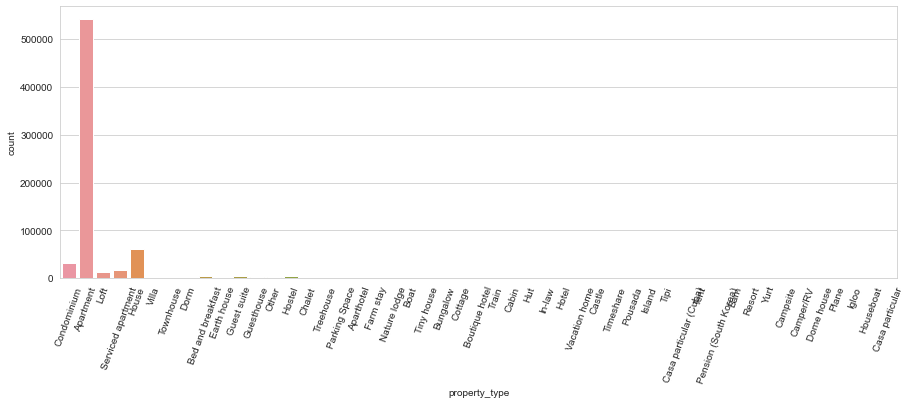

In [27]:
print(all_df["property_type"].value_counts())

plt.figure(figsize=(15,5))
count_plt = sns.countplot("property_type", data = all_df)
count_plt.tick_params(axis="x", rotation=70)

In [28]:
table_types = all_df["property_type"].value_counts()
columns_group = list()
for ttype in table_types.index:
    if table_types[ttype] <= 2000:
        columns_group.append(ttype)

for ttype in columns_group:
    all_df.loc[all_df["property_type"] == ttype, "property_type"] = "Other"

Apartment             541515
House                  61648
Condominium            31832
Serviced apartment     17332
Loft                   13403
Other                  11949
Bed and breakfast       4791
Guest suite             4218
Hostel                  3778
Guesthouse              2647
Name: property_type, dtype: int64


C:\Users\digof\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



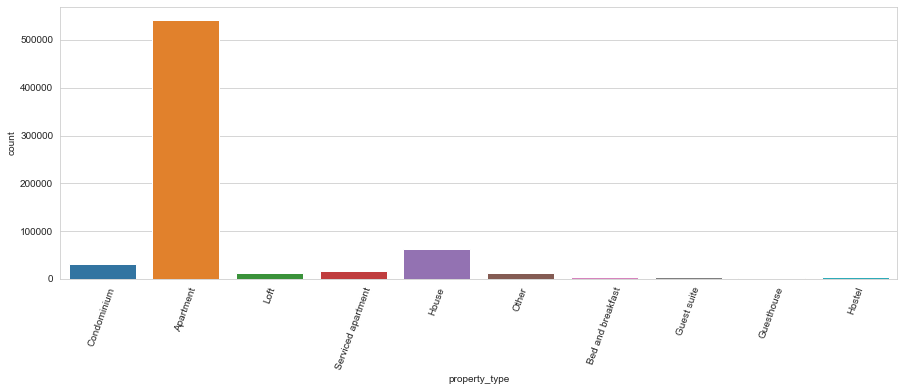

In [29]:
print(all_df["property_type"].value_counts())

plt.figure(figsize=(15,5))
count_plt = sns.countplot("property_type", data = all_df)
count_plt.tick_params(axis="x", rotation=70)

Entire home/apt    463969
Private room       211257
Shared room         15991
Hotel room           1896
Name: room_type, dtype: int64


C:\Users\digof\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



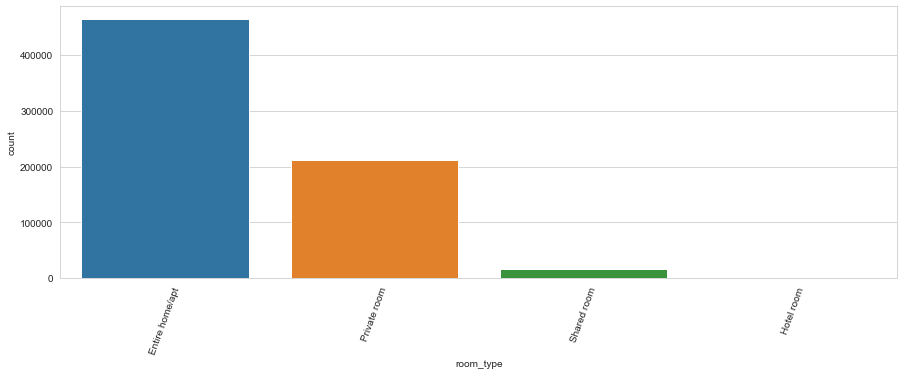

In [30]:
print(all_df["room_type"].value_counts())

plt.figure(figsize=(15,5))
count_plt = sns.countplot("room_type", data = all_df)
count_plt.tick_params(axis="x", rotation=70)

Real Bed         681163
Pull-out Sofa      8281
Futon              1858
Airbed             1244
Couch               567
Name: bed_type, dtype: int64


C:\Users\digof\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



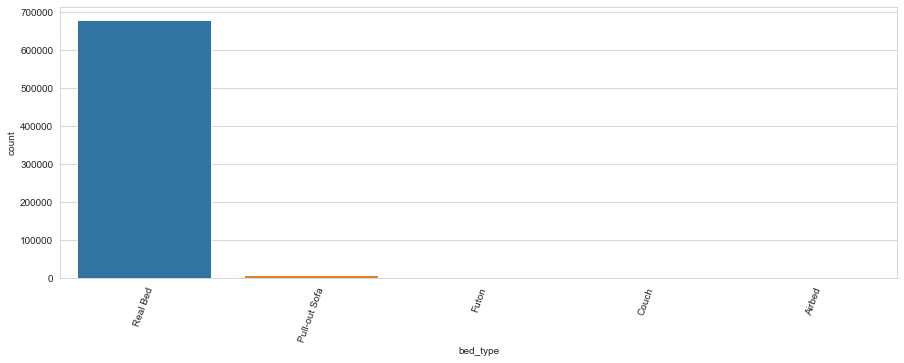

In [31]:
print(all_df["bed_type"].value_counts())

plt.figure(figsize=(15,5))
count_plt = sns.countplot("bed_type", data = all_df)
count_plt.tick_params(axis="x", rotation=70)

flexible                       287324
strict_14_with_grace_period    259362
moderate                       124680
strict                          12766
super_strict_60                  6420
super_strict_30                  2561
Name: cancellation_policy, dtype: int64


C:\Users\digof\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



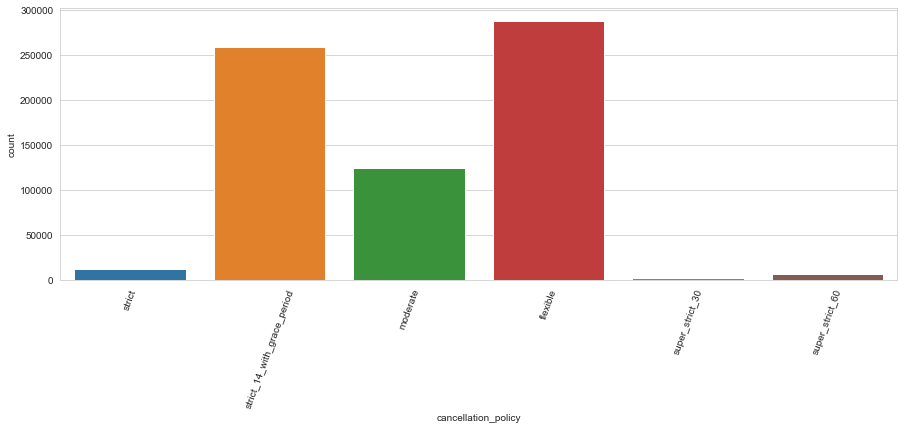

In [32]:
print(all_df["cancellation_policy"].value_counts())

plt.figure(figsize=(15,5))
count_plt = sns.countplot("cancellation_policy", data = all_df)
count_plt.tick_params(axis="x", rotation=70)

In [33]:
all_df["num_of_amenities"] = all_df["amenities"].str.split(",").apply(len)
all_df = all_df.drop("amenities", axis = 1)

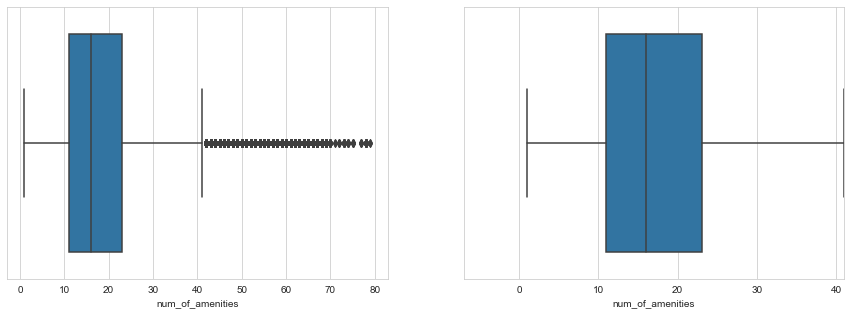

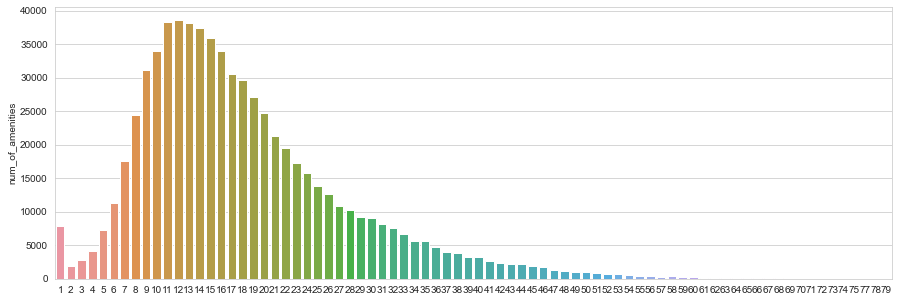

In [34]:
diagram_box(all_df["num_of_amenities"])
bar(all_df["num_of_amenities"])

In [35]:
all_df, removed_lines = remove_outliers(all_df, "num_of_amenities")
print(removed_lines)

20696


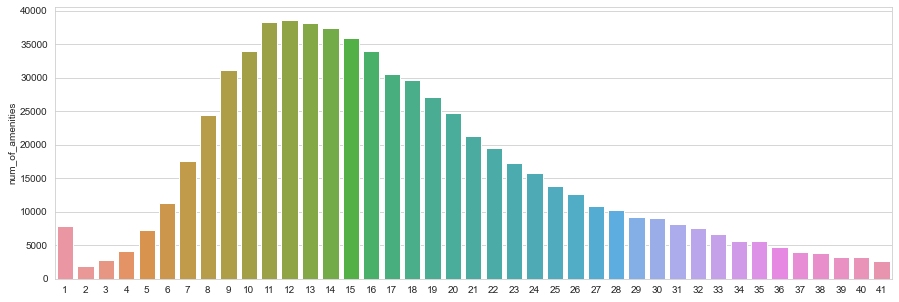

In [36]:
bar(all_df["num_of_amenities"])

In [37]:
sample = all_df.sample(n = 50000)
map_center = {"lat": sample.latitude.mean(), "lon": sample.longitude.mean()}
fig = px.density_mapbox(sample, lat="latitude", lon="longitude", z="price",
                        radius=2.5, center=map_center, zoom=10, mapbox_style="stamen-terrain")

fig.show()

In [38]:
tf_columns = ["host_is_superhost", "instant_bookable", "is_business_travel_ready"]
base_all_enc = all_df.copy()
for column in tf_columns:
    base_all_enc.loc[base_all_enc[column] == "t", column] = 1
    base_all_enc.loc[base_all_enc[column] == "f", column] = 0


In [39]:
cat_columns = ["property_type", "room_type", "bed_type", "cancellation_policy"]

base_all_enc = pd.get_dummies(data=base_all_enc, columns=cat_columns)

In [42]:
def eval_model(model_name, y_test, prediction):
    r2 = r2_score(y_test, prediction)
    MSE = np.sqrt(mean_squared_error(y_test, prediction))
    return f"Model {model_name}:\nR²: {r2:.2%}\nMSE: {MSE}\n"

In [41]:
rf_model = RandomForestRegressor()
lr_model = LinearRegression()
et_model = ExtraTreesRegressor()

models = {"RandomForest": rf_model,
          "LinearRegression": lr_model,
          "ExtraTrees": et_model}

y = base_all_enc["price"]
x = base_all_enc.drop("price", axis=1)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=5)

for model_name, model in models.items():
    model.fit(X_train, y_train)

    prediction = model.predict(X_test)
    print(eval_model(model_name, y_test, prediction))

Model RandomForest:
R²: 96.26%
MSE: 51.69281335662511

Model LinearRegression:
R²: 33.63%
MSE: 217.84554695496723

Model ExtraTrees:
R²: 96.82%
MSE: 47.6481300855814



In [45]:
print(et_model.feature_importances_)
print(X_train.columns)

[0.01008295 0.04609049 0.08725649 0.08303738 0.07635014 0.11794598
 0.05715879 0.04481722 0.07705175 0.05805559 0.06402446 0.01912954
 0.         0.01114323 0.00550601 0.06796235 0.01144954 0.00118411
 0.00538471 0.00078599 0.00082714 0.0007147  0.00743712 0.00208656
 0.0029223  0.0027574  0.08799312 0.00032129 0.0019294  0.00211717
 0.00027637 0.00039994 0.00053949 0.00189966 0.00174081 0.01749927
 0.01173837 0.00083413 0.00861103 0.00069937 0.00223863]
Index(['host_is_superhost', 'host_listings_count', 'latitude', 'longitude',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'extra_people',
       'minimum_nights', 'number_of_reviews', 'instant_bookable',
       'is_business_travel_ready', 'year', 'month', 'num_of_amenities',
       'property_type_Apartment', 'property_type_Bed and breakfast',
       'property_type_Condominium', 'property_type_Guest suite',
       'property_type_Guesthouse', 'property_type_Hostel',
       'property_type_House', 'property_type_Loft', 'property_

0
bathrooms                                        0.117946
room_type_Entire home/apt                        0.087993
latitude                                         0.087256
longitude                                        0.083037
extra_people                                     0.077052
accommodates                                     0.076350
num_of_amenities                                 0.067962
number_of_reviews                                0.064024
minimum_nights                                   0.058056
bedrooms                                         0.057159
host_listings_count                              0.046090
beds                                             0.044817
instant_bookable                                 0.019130
cancellation_policy_flexible                     0.017499
cancellation_policy_moderate                     0.011738
property_type_Apartment                          0.011450
year                                             0.011143
host_is_superhost                                0.010083
cancellation_policy_strict_14_with_grace_period  0.008611
property_type_House                              0.007437
month                                            0.005506
property_type_Condominium                        0.005385
property_type_Other                              0.002922
property_type_Serviced apartment                 0.002757
cancellation_policy_super_strict_60              0.002239
room_type_Shared room                            0.002117
property_type_Loft                               0.002087
room_type_Private room                           0.001929
bed_type_Pull-out Sofa                           0.001900
bed_type_Real Bed                                0.001741
property_type_Bed and breakfast                  0.001184
cancellation_policy_strict                       0.000834
property_type_Guesthouse                         0.000827
property_type_Guest suite                        0.000786
property_type_Hostel                             0.000715
cancellation_policy_super_strict_30              0.000699
bed_type_Futon                                   0.000539
bed_type_Couch                                   0.000400
room_type_Hotel room                             0.000321
bed_type_Airbed                                  0.000276
is_business_travel_ready                         0.000000

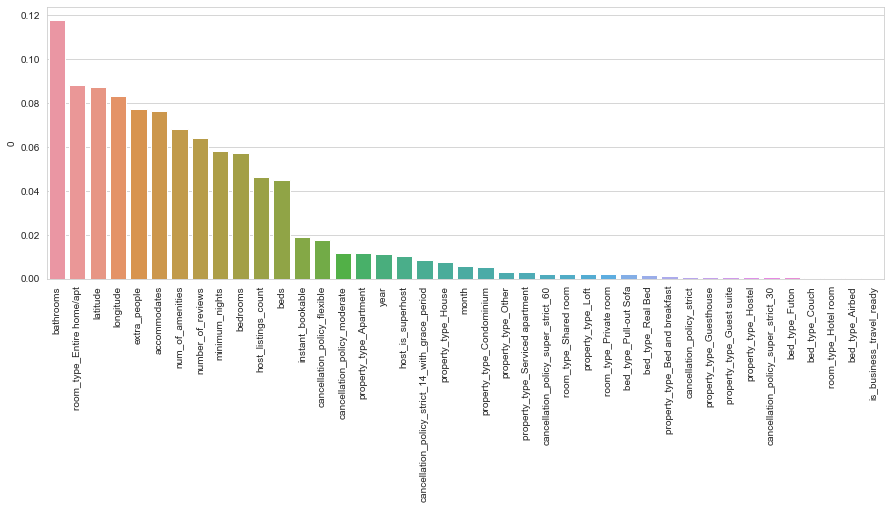

In [50]:
feat_importance = pd.DataFrame(model.feature_importances_, X_train.columns)
feat_importance = feat_importance.sort_values(by=0, ascending=False)
plt.figure(figsize=(15,5))
ax = sns.barplot(x=feat_importance.index, y=feat_importance[0])
ax.tick_params(axis="x", rotation=90)
display(feat_importance)

Model ExtraTrees:
R²: 96.84%
MSE: 47.542078072514



0
bathrooms                                        0.110689
room_type_Entire home/apt                        0.087404
latitude                                         0.087167
longitude                                        0.083211
accommodates                                     0.081789
extra_people                                     0.079590
num_of_amenities                                 0.068159
number_of_reviews                                0.062394
bedrooms                                         0.058654
minimum_nights                                   0.058317
host_listings_count                              0.046135
beds                                             0.044595
instant_bookable                                 0.019188
cancellation_policy_flexible                     0.017276
cancellation_policy_moderate                     0.011678
property_type_Apartment                          0.011474
year                                             0.011198
host_is_superhost                                0.009897
cancellation_policy_strict_14_with_grace_period  0.008478
property_type_House                              0.007474
month                                            0.005448
property_type_Condominium                        0.005321
property_type_Other                              0.002911
property_type_Serviced apartment                 0.002805
cancellation_policy_super_strict_60              0.002223
property_type_Loft                               0.002117
room_type_Private room                           0.002066
room_type_Shared room                            0.002035
bed_type_Pull-out Sofa                           0.001880
bed_type_Real Bed                                0.001799
property_type_Bed and breakfast                  0.001247
cancellation_policy_strict                       0.000827
property_type_Guesthouse                         0.000790
property_type_Guest suite                        0.000774
property_type_Hostel                             0.000727
cancellation_policy_super_strict_30              0.000710
bed_type_Futon                                   0.000554
bed_type_Couch                                   0.000414
room_type_Hotel room                             0.000327
bed_type_Airbed                                  0.000259

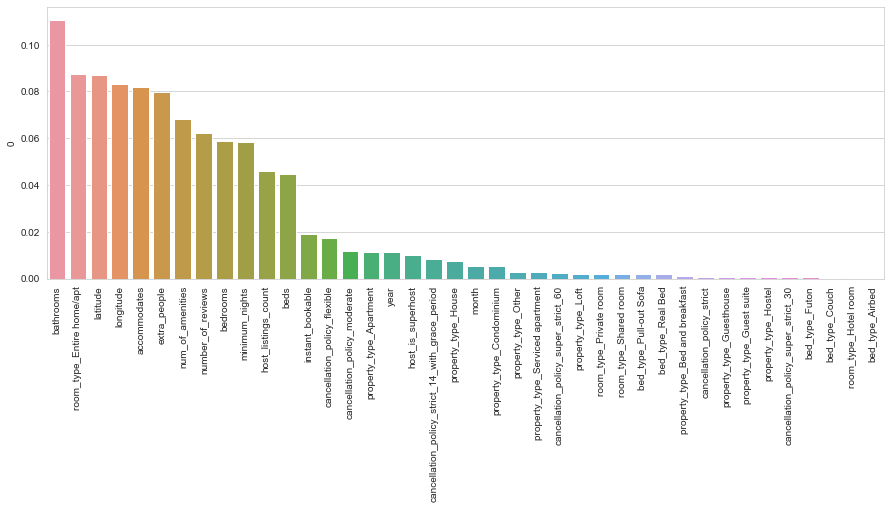

In [51]:
base_all_enc = base_all_enc.drop("is_business_travel_ready", axis=1)

y = base_all_enc["price"]
x = base_all_enc.drop("price", axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=5)

et_model.fit(X_train, y_train)
prediction = et_model.predict(X_test)
print(eval_model("ExtraTrees", y_test, prediction))

feat_importance = pd.DataFrame(model.feature_importances_, X_train.columns)
feat_importance = feat_importance.sort_values(by=0, ascending=False)
plt.figure(figsize=(15,5))
ax = sns.barplot(x=feat_importance.index, y=feat_importance[0])
ax.tick_params(axis="x", rotation=90)
display(feat_importance)

Model ExtraTrees:
R²: 96.83%
MSE: 47.61702326121741



0
bathrooms                                        0.119432
room_type_Entire home/apt                        0.089964
latitude                                         0.088629
longitude                                        0.085069
extra_people                                     0.075903
accommodates                                     0.070461
num_of_amenities                                 0.068510
number_of_reviews                                0.064117
bedrooms                                         0.059955
minimum_nights                                   0.058091
host_listings_count                              0.046662
beds                                             0.044797
instant_bookable                                 0.019325
cancellation_policy_flexible                     0.017221
property_type_Apartment                          0.011616
cancellation_policy_moderate                     0.011550
year                                             0.011289
host_is_superhost                                0.011130
cancellation_policy_strict_14_with_grace_period  0.008545
property_type_House                              0.007393
month                                            0.005491
property_type_Condominium                        0.005326
property_type_Other                              0.002924
property_type_Serviced apartment                 0.002804
cancellation_policy_super_strict_60              0.002219
property_type_Loft                               0.002192
room_type_Shared room                            0.002028
room_type_Private room                           0.001856
property_type_Bed and breakfast                  0.001262
cancellation_policy_strict                       0.000849
property_type_Guesthouse                         0.000841
property_type_Guest suite                        0.000783
property_type_Hostel                             0.000764
cancellation_policy_super_strict_30              0.000700
room_type_Hotel room                             0.000304

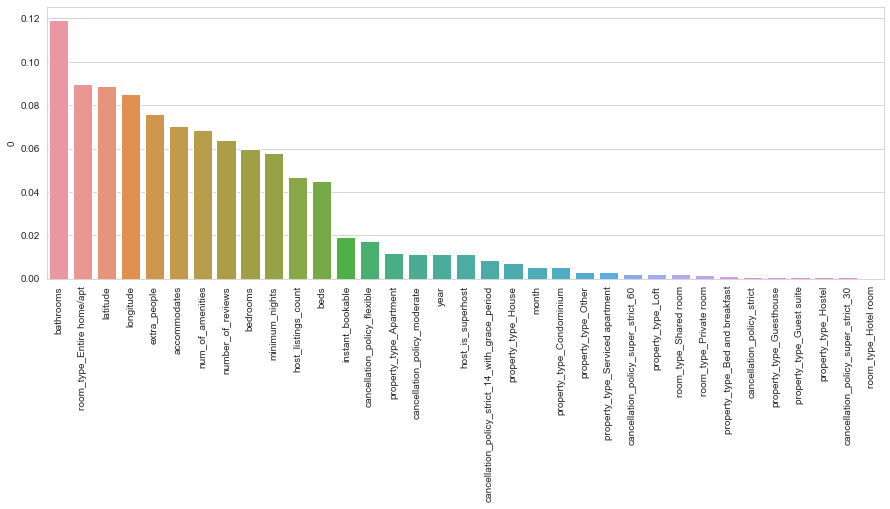

In [52]:
base_all_test = base_all_enc.copy()

for column in base_all_test:
    if "bed_type" in column:
        base_all_test = base_all_test.drop(column, axis=1)

y = base_all_test["price"]
x = base_all_test.drop("price", axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=5)

et_model.fit(X_train, y_train)
prediction = et_model.predict(X_test)
print(eval_model("ExtraTrees", y_test, prediction))

feat_importance = pd.DataFrame(model.feature_importances_, X_train.columns)
feat_importance = feat_importance.sort_values(by=0, ascending=False)
plt.figure(figsize=(15,5))
ax = sns.barplot(x=feat_importance.index, y=feat_importance[0])
ax.tick_params(axis="x", rotation=90)
display(feat_importance)

In [54]:
x["price"] = y
x.to_csv("data.csv")

In [55]:
joblib.dump(et_model, "et_model.joblib")

['et_model.joblib']